**Using optimization functions from scipy**

In attempting to replicate a logistic regression function in Python, I realized that I had to take a step back and learn how to properly to use minimization functions. I create a few examples and apply the scipy optimization functions.

In [1]:
# Import packages
import os
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
# Create simple dataframe for plotting and trying minimization functions.
# df = pd.DataFrame(np.zeros((10,3)), columns=['x1', 'x2','y'])
# df.loc[range(5), 'x1'] = np.random.normal(loc=2, scale=1, size=5)
# df.loc[range(5,10), 'x2'] = np.random.normal(loc=5, scale=1, size=5)
# df.loc[range(5,10), 'y']  = np.ones(1)
# df['y'] = 

In [40]:
# Create simple dataframe for plotting and trying minimization functions.
df = pd.DataFrame(np.zeros((10,2)), columns=['x1', 'y'])
df.loc[range(5), 'x1'] = np.random.normal(loc=2, scale=1, size=5)
df.loc[range(5,10), 'x1'] = np.random.normal(loc=5, scale=1, size=5)
df.loc[range(5,10), 'y']  = np.ones(1)
# df['y'] = 

In [44]:
# View dataframe
df

,x1,y
0,2.849407,0.0
1,0.580929,0.0
2,2.569329,0.0
3,2.466302,0.0
4,1.334152,0.0
5,5.401316,1.0
6,4.718966,1.0
7,4.510937,1.0
8,3.042413,1.0
9,4.869066,1.0


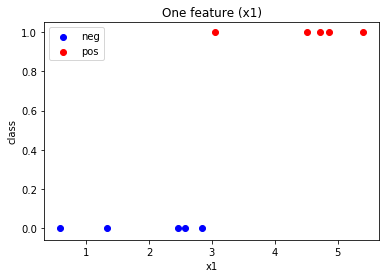

In [43]:
# One feature visualizations
f, (ax1) = plt.subplots(1,1);

df_temp = df[df['y']==0];
ax1.scatter(x=df_temp['x1'], y=df_temp['y'], color='blue', label='neg');
df_temp = df[df['y']==1]
ax1.scatter(x=df_temp['x1'], y=df_temp['y'], color='red', label='pos');
ax1.set_xlabel('x1');
ax1.set_ylabel('class');
ax1.set_title('One feature (x1)');
ax1.legend();

## Minimization function

### Case with only having theta0 = 1

In [2]:
# Try using the fmin function. 
from scipy.optimize import fmin

In [3]:
# Test function is a parabola where it's minimum is at x=0, y=2
def f1(x):
    y = (x+2)**2
    return y

In [4]:
x_test = [-4, -3, -2, -1, 0, 1, 2, 3, 4]
# Look at the function outputs
y_test = [f1(i) for i in x_test]
print(y_test)

[4, 1, 0, 1, 4, 9, 16, 25, 36]


In [6]:
# I'm going to make my initial guess as 0.
x0 = 0
minimum = fmin(f1, x0, xtol=1e-8)
print("The value of to give the minimum function value is: ", minimum[0])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 40
         Function evaluations: 80
The value of to give the minimum function value is:  -2.0


### Case with having theta0 and theta1

In [48]:
# Test function is a parabola where there are two arguments, x is listed first
def f2(x,a):
    y = a*(x+2)**2
    return y

In [49]:
del a

In [50]:
x_test = [-4, -3, -2, -1, 0, 1, 2, 3, 4]
# Look at the function outputs
#a = 2
y_test = [f2(i,a) for i in x_test]
print(y_test)

NameError: name 'a' is not defined

In [56]:
# I'm going to make my initial guess as 0.

x0 = [10, 2]
#x = 2
minimum = fmin(f2, x0 = x0, xtol=1e-8, args=(a,))
print("The value of x to give the minimum function value is: ", minimum[0])

NameError: name 'a' is not defined

In [40]:
# Test function is a parabola where there are two arguments, x is listed first
def f3(a,x):
    y = a*(x+2)**2
    return y

In [41]:
# I'm going to make my initial guess as 0.

x0 = 0
x = 0
minimum = fmin(f3, x0, xtol=1e-8, args=(x,))
print("The value of a to give the minimum function value is: ", minimum[0])

The value of a to give the minimum function value is:  -3.16912650057e+26


In [ ]:
### Have theta0 and theta1